In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [3]:
sbi=pd.read_csv('SBI_Life_Insurance.csv')

In [80]:
sbi.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [81]:
sbi.shape

(1338, 8)

In [82]:
sbi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [83]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [85]:
sbi.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [4]:
sbi.duplicated().sum()

1

In [5]:
#Removing Duplicates
sbi.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


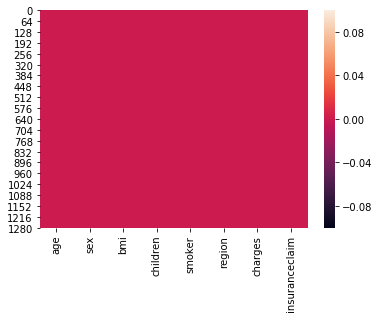

In [88]:
#To check missing value
sns.heatmap(sbi.isnull())

In [6]:
sbi.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Summary Statistic

In [7]:
sbi.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


Check Correlation

In [8]:
sbi.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


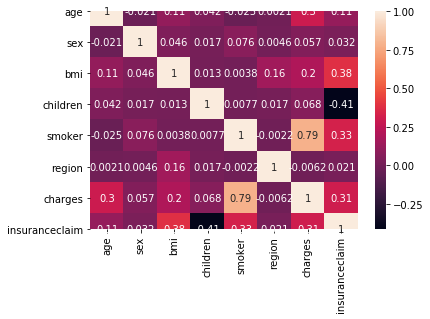

In [9]:
sns.heatmap(sbi.corr(),annot=True)

Plotting Outliers

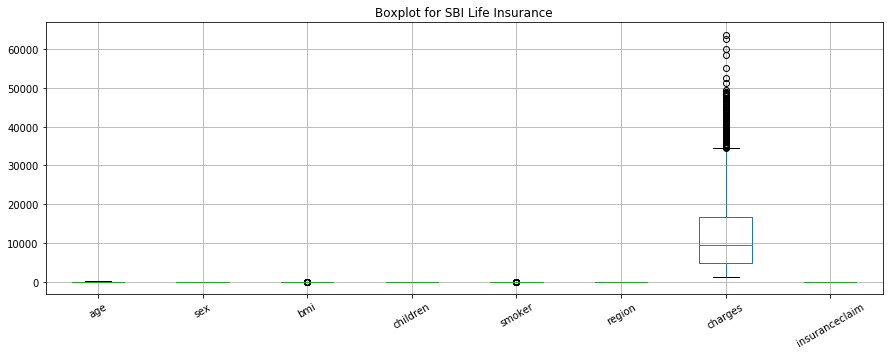

In [93]:
sbi.plot(kind='box',grid=True,title="Boxplot for SBI Life Insurance",legend=True,rot=30,figsize=(15,5))

In [10]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(sbi))
print(sbi.shape)
sbi= sbi.loc[(z_score < 3).all(axis=1)]
print(sbi.shape)

(1338, 8)
(1309, 8)


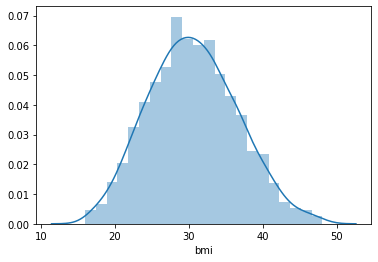

In [95]:
#Check for Skewness
sns.distplot(sbi['bmi'])

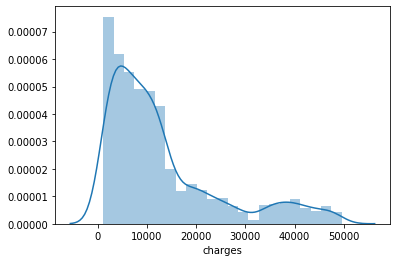

In [96]:
sns.distplot(sbi['charges'])

In [11]:
#check skewsness
sbi.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.738119
smoker            1.482731
region           -0.023027
charges           1.437160
insuranceclaim   -0.352569
dtype: float64

In [12]:
for col in sbi.columns:
    if sbi.skew().loc[col] > 0.55:
        sbi[col]=np.log1p(sbi[col])

In [13]:
sbi.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.225539
smoker            1.482731
region           -0.023027
charges          -0.107087
insuranceclaim   -0.352569
dtype: float64

Exploring Data Variables

In [14]:
#SEX
sbi.sex.unique()

array([0, 1], dtype=int64)

In [101]:
sbi.sex.value_counts()

1    658
0    651
Name: sex, dtype: int64

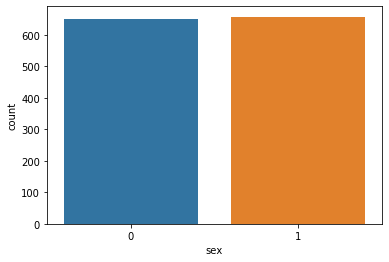

In [102]:
sns.countplot(x='sex',data=sbi)

In [103]:
#CHILDREN
sbi.children.unique()

array([0.        , 0.69314718, 1.38629436, 1.09861229, 1.60943791])

In [104]:
sbi.children.value_counts()

0.000000    568
0.693147    320
1.098612    240
1.386294    156
1.609438     25
Name: children, dtype: int64

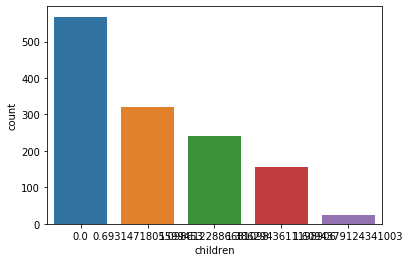

In [105]:
sns.countplot(x='children',data=sbi)

In [106]:
#SMOKER
sbi.smoker.unique()

array([0.69314718, 0.        ])

In [107]:
sbi.smoker.value_counts()

0.000000    1044
0.693147     265
Name: smoker, dtype: int64

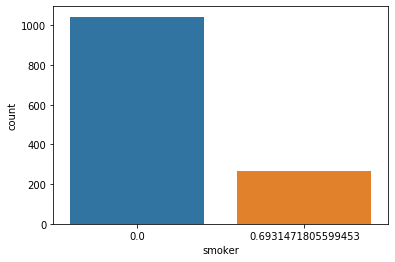

In [108]:
sns.countplot(x='smoker',data=sbi)

In [109]:
#REGION
sbi.region.unique()

array([3, 2, 1, 0], dtype=int64)

In [110]:
sbi.region.value_counts()

2    352
1    322
0    320
3    315
Name: region, dtype: int64

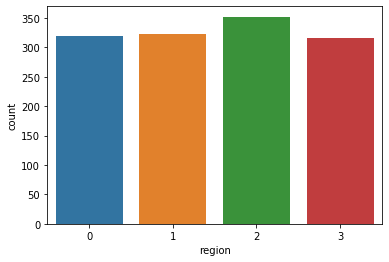

In [111]:
sns.countplot(x='region',data=sbi)

In [112]:
#INSURANCECLAIM
sbi.insuranceclaim.unique()

array([1, 0], dtype=int64)

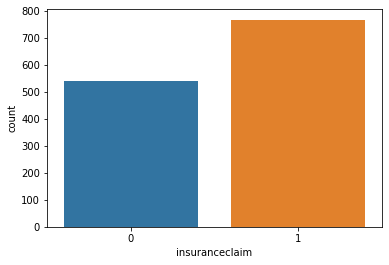

In [113]:
#Bivariate Analysis
sns.countplot(x='insuranceclaim',data=sbi)

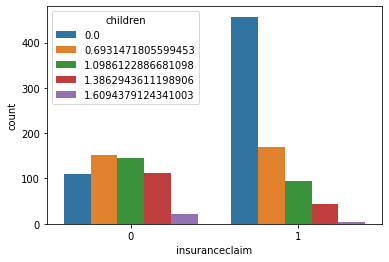

In [114]:
sns.countplot(x='insuranceclaim',hue='children',data=sbi)

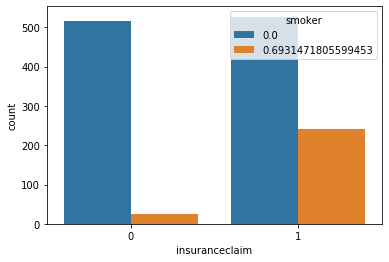

In [115]:
sns.countplot(x='insuranceclaim',hue='smoker',data=sbi)

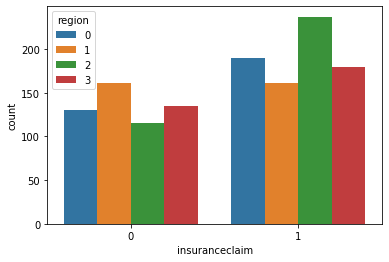

In [116]:
sns.countplot(x='insuranceclaim',hue='region',data=sbi)

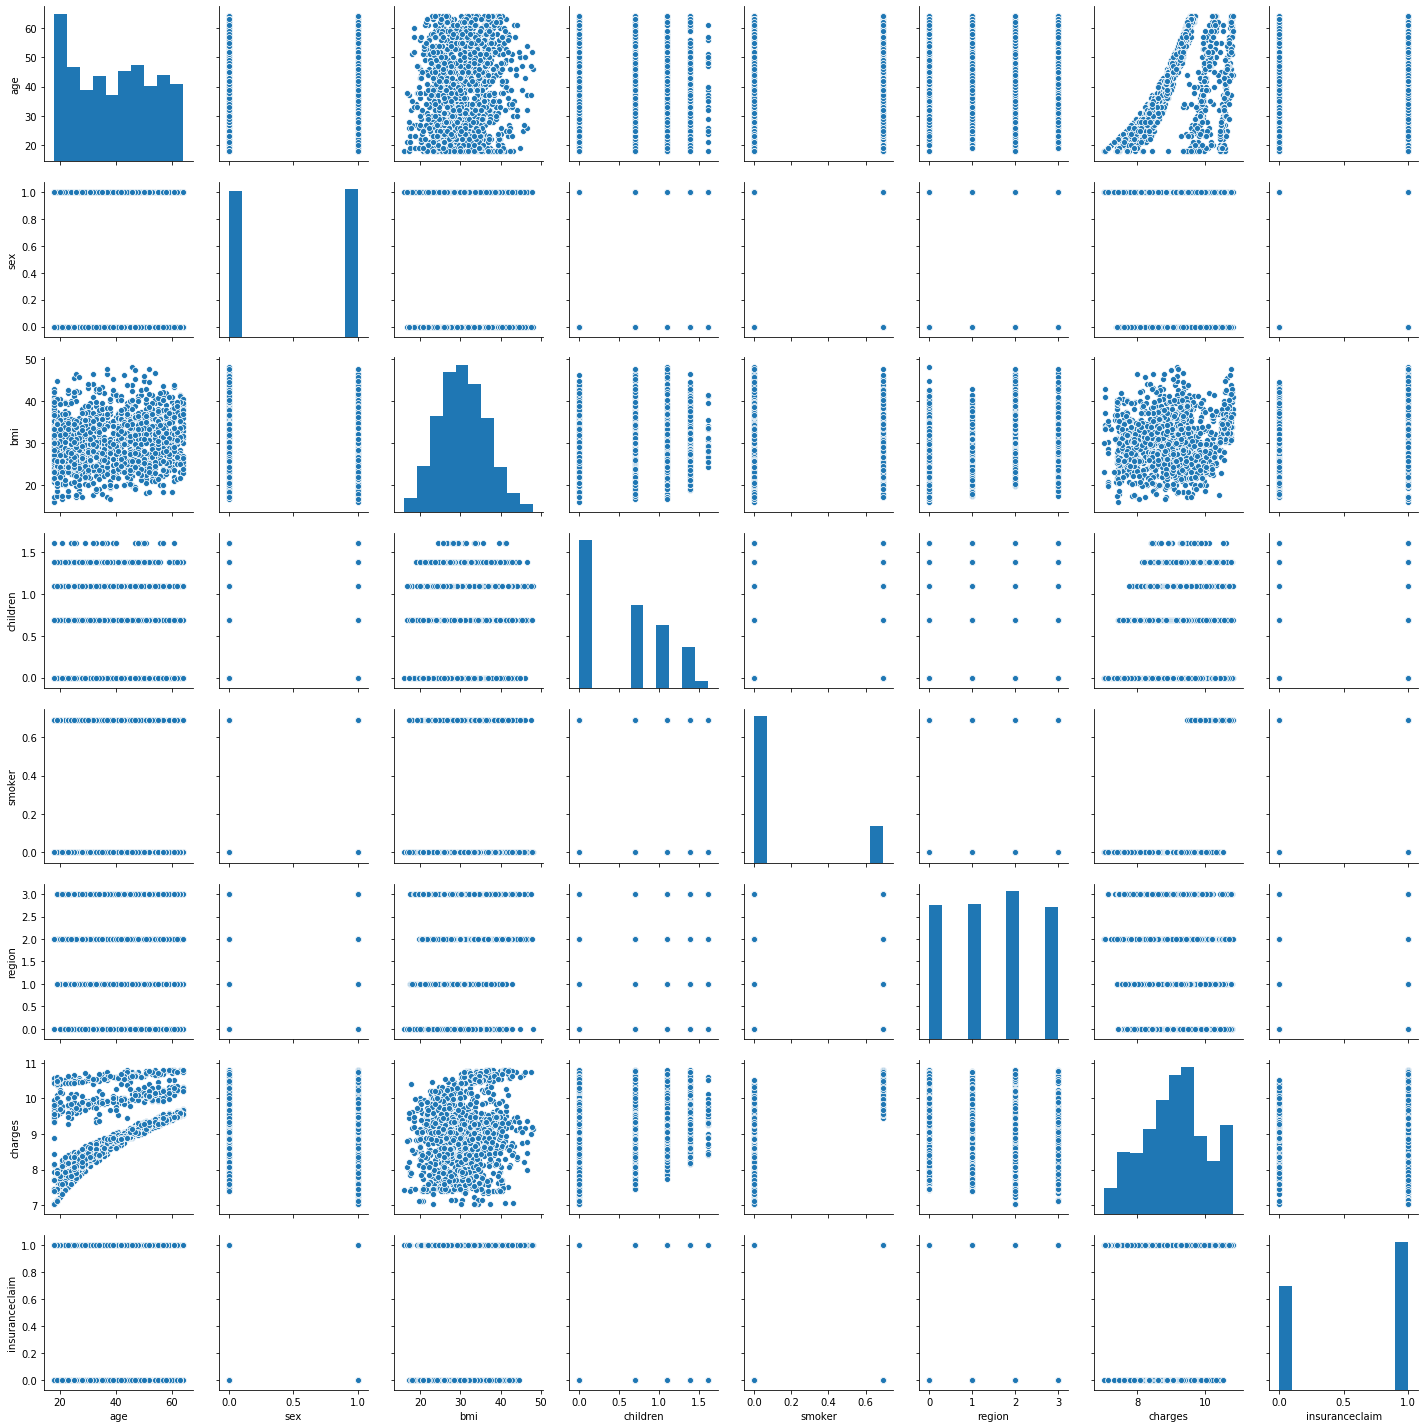

In [117]:
sns.pairplot(sbi)

Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
labelquality = LabelEncoder()

In [16]:
sbi['insuranceclaim'] = labelquality.fit_transform(sbi['insuranceclaim'])

Features and Target Value

In [17]:
x=sbi.drop('insuranceclaim',axis=1)
y=sbi['insuranceclaim']

In [18]:
x.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0.000000,0.693147,3,9.734236
1,18,1,33.77,0.693147,0.000000,2,7.453882


In [19]:
y.head(2)

0    1
1    1
Name: insuranceclaim, dtype: int64

Standardisation 

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
x=sc.fit_transform(x)
x

array([[-1.43906316, -1.00536197, -0.44935891, ...,  1.98484827,
         1.35275274,  0.70311423],
       [-1.5100858 ,  0.99466663,  0.53339072, ..., -0.50381685,
         0.44745962, -1.79090598],
       [-0.79985933,  0.99466663,  0.40447808, ..., -0.50381685,
         0.44745962, -0.75530297],
       ...,
       [-1.5100858 , -1.00536197,  1.04904129, ..., -0.50381685,
         0.44745962, -1.85328541],
       [-1.29701786, -1.00536197, -0.80093884, ..., -0.50381685,
         1.35275274, -1.62522901],
       [ 1.54388803, -1.00536197, -0.25347866, ...,  1.98484827,
        -0.45783349,  1.29995924]])

Spilt Train and Test

In [22]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    return random_state
        

Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

random_state for mod  is  79 which gives accuracy score of:  0.9007633587786259
f1_score:  0.8747346072186837
confusion matrix:  [[128  28]
 [ 31 206]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       156
           1       0.88      0.87      0.87       237

    accuracy                           0.85       393
   macro avg       0.84      0.84      0.84       393
weighted avg       0.85      0.85      0.85       393



In [24]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.8716599049805158

KNN

In [27]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(1,10),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=15)
kn_g.fit(x,y)
kn_g.best_params_

{'leaf_size': 20, 'n_neighbors': 3}

In [28]:
kn=KNeighborsClassifier(n_neighbors=3)
knn=rst(kn,x,y)

random_state for mod  is  49 which gives accuracy score of:  0.9185750636132316
f1_score:  0.8652173913043479
confusion matrix:  [[132  24]
 [ 38 199]]
classification report:                precision    recall  f1-score   support

           0       0.78      0.85      0.81       156
           1       0.89      0.84      0.87       237

    accuracy                           0.84       393
   macro avg       0.83      0.84      0.84       393
weighted avg       0.85      0.84      0.84       393



In [29]:
#Cross Validation
accuracy_score_2=cross_val_score(kn,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_2

0.8938099432374242

DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [31]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=9)
dtc=rst(dt,x,y)

random_state for mod  is  123 which gives accuracy score of:  1.0
f1_score:  0.967741935483871
confusion matrix:  [[153   3]
 [ 12 225]]
classification report:                precision    recall  f1-score   support

           0       0.93      0.98      0.95       156
           1       0.99      0.95      0.97       237

    accuracy                           0.96       393
   macro avg       0.96      0.97      0.96       393
weighted avg       0.96      0.96      0.96       393



In [32]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.9755020551967117

GaussianNB

In [33]:
nb=GaussianNB()
gnb=rst(nb,x,y)

random_state for mod  is  133 which gives accuracy score of:  0.8422391857506362
f1_score:  0.7828162291169452
confusion matrix:  [[138  18]
 [ 73 164]]
classification report:                precision    recall  f1-score   support

           0       0.65      0.88      0.75       156
           1       0.90      0.69      0.78       237

    accuracy                           0.77       393
   macro avg       0.78      0.79      0.77       393
weighted avg       0.80      0.77      0.77       393



In [34]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_4

0.7967677360807132

SVC

In [35]:
sv=SVC()
sv_param={'kernel':('rbf','linear','poly'),'degree':range(3,8)}
sv_g=GridSearchCV(sv,sv_param,cv=15)
sv_g.fit(x,y)
sv_g.best_params_

{'degree': 3, 'kernel': 'rbf'}

In [137]:
sv=SVC(kernel='rbf',degree=3)
svc=rst(sv,x,y)

random_state for mod  is  49 which gives accuracy score of:  0.9287531806615776
f1_score:  0.911504424778761
confusion matrix:  [[147   9]
 [ 31 206]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.94      0.88       156
           1       0.96      0.87      0.91       237

    accuracy                           0.90       393
   macro avg       0.89      0.91      0.90       393
weighted avg       0.91      0.90      0.90       393



In [36]:
#Cross Validation
accuracy_score_5=cross_val_score(sv,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.906029377746935

Gradient Boosting

In [38]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.1, 'n_estimators': 750}

 best score: 0.972707423580786


In [39]:
gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators= 750)
gbc=rst(gb,x,y)

random_state for mod  is  77 which gives accuracy score of:  0.9974554707379135
f1_score:  0.9830508474576272
confusion matrix:  [[153   3]
 [  5 232]]
classification report:                precision    recall  f1-score   support

           0       0.97      0.98      0.97       156
           1       0.99      0.98      0.98       237

    accuracy                           0.98       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393



In [40]:
#Cross Validation
accuracy_score_6=cross_val_score(gb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_6

0.985460951262478

Final Model

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=133)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acs=accuracy_score(pred,y_test)
f1=f1_score(y_test,pred)
cnf=confusion_matrix(y_test,pred)
clr=classification_report(y_test,pred)
print('accuracy score: ', acs)
print('f1_score:', f1)
print('confusion matrix:\n',cnf)
print('classification report:\n', clr)

accuracy score:  0.9872773536895675
f1_score: 0.9886104783599089
confusion matrix:
 [[171   5]
 [  0 217]]
classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       176
           1       0.98      1.00      0.99       217

    accuracy                           0.99       393
   macro avg       0.99      0.99      0.99       393
weighted avg       0.99      0.99      0.99       393



In [42]:
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.02840909 1.        ]
[0. 1. 1.]
[2 1 0]


In [44]:
scoring=roc_auc_score(y_test,pred)
scoring

0.9857954545454545

In [45]:
roc_auc=auc(fpr,tpr)
roc_auc

0.9857954545454545

ROC Curve

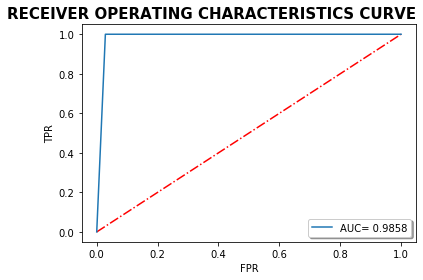

In [46]:
plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
plt.legend(loc='best',fontsize='medium',shadow=True)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
plt.show()

In [47]:
import joblib
joblib.dump(dt,"DecisionTree_SBI_InsuranceClaim.pkl")

['DecisionTree_SBI_InsuranceClaim.pkl']